<a href="https://colab.research.google.com/github/mhmtnzly/Class5-Math-Stats-Module-Week14/blob/main/Statistics-week14.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework 1

## A - DATA

* 1- "The data concerns city-cycle fuel consumption in miles per gallon, to be predicted in terms of 3 multivalued discrete and 5 continuous attributes." (Quinlan, 1993)
* 2- Data types
1. mpg:           continuous
2. cylinders:     multi-valued discrete
3. displacement:  continuous
4. horsepower:    continuous
5. weight:        continuous
6. acceleration:  continuous
7. model year:    multi-valued discrete
8. origin:        multi-valued discrete
9. car name:      string (unique for each instance)


In [1]:
import seaborn as sns
data=sns.load_dataset('mpg')
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


3- Description statistics of data.

* There may be some outlier in horsepower and acceleration variables. They should be analyzed. 

In [2]:
data.describe([0.01,0.05,0.25,0.5,.75,.95,.99]).T

,count,mean,std,min,1%,5%,25%,50%,75%,95%,99%,max
mpg,398.0,23.514573,7.815984,9.0,11.000,13.000,17.500,23.0,29.000,37.030,43.418,46.6
cylinders,398.0,5.454774,1.701004,3.0,3.970,4.000,4.000,4.0,8.000,8.000,8.000,8.0
displacement,398.0,193.425879,104.269838,68.0,70.970,85.000,104.250,148.5,262.000,400.000,440.420,455.0
horsepower,392.0,104.469388,38.491160,46.0,48.000,60.550,75.000,93.5,126.000,180.000,220.450,230.0
weight,398.0,2970.424623,846.841774,1613.0,1772.610,1923.500,2223.750,2803.5,3608.000,4464.000,4951.030,5140.0
acceleration,398.0,15.568090,2.757689,8.0,9.485,11.285,13.825,15.5,17.175,20.415,22.239,24.8
model_year,398.0,76.010050,3.697627,70.0,70.000,70.000,73.000,76.0,79.000,82.000,82.000,82.0


4-

* When looking at the graphics, mpg, horsepower and acceleration have some outlier values. 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


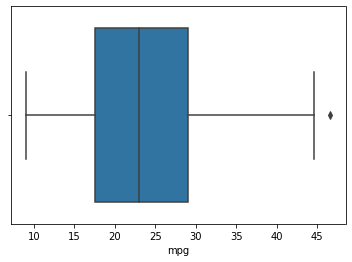

In [3]:
sns.boxplot(data['mpg']);

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


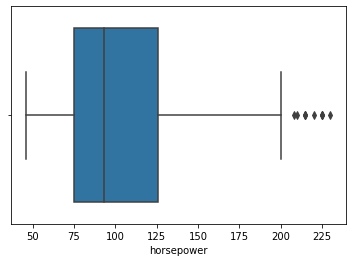

In [4]:
sns.boxplot(data['horsepower']);

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


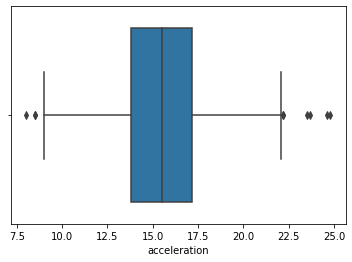

In [5]:
sns.boxplot(data['acceleration']);

In [ ]:
sns.pairplot(data, diag_kind="kde");

In [ ]:
sns.histplot(data=data, x="acceleration", kde=True);

5-

* Best variables for predicting mpg is weight because correlation is -0.83 between mpg and weight. As weight decreases, mpg increases.

In [ ]:
sns.heatmap(data.corr(), vmin=-1, vmax=1, annot=True);

In [ ]:
from sklearn.model_selection import train_test_split
y = data["mpg"]
X = data['weight']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state =46)

In [ ]:
from scipy import stats
slope, intercept, r_value, p_value, std_err = stats.linregress(X_train,y_train)

In [ ]:
p_value # nearly it is equal to 0

In [ ]:
print(intercept,'+','x*',slope) # model

In [ ]:
intercept+slope*X_test.iloc[[0]]

In [ ]:
y_test.iloc[[0]] # as original value is 15.0, predicted values is 12.27

In [ ]:
results=stats.linregress(X_train,y_train)
import matplotlib.pyplot as plt
plt.plot(X_test,y_test, 'o', label='original data')
plt.plot(X_test, results.intercept + results.slope*X_test, 'r', label='fitted line')
plt.legend()
plt.show()

In [ ]:
r_value

# Homework-2

In [ ]:
import pandas as pd
import numpy as np
np.random.seed(42)
veri1 = np.random.normal(10000, 1000, 500).astype(int)
veri2 = np.random.normal(9000, 900, 500).astype(int)
veri3 = np.random.normal(12000, 1200, 500).astype(int)
veri4 = np.random.normal(10000, 950, 500).astype(int)
df = pd.DataFrame(np.array([veri1,veri2,veri3,veri4]).T, columns=['A_once','B_once','A_sonra','B_sonra'])
olcum = df.copy()
olcum.head()

It is observed that there is a linear increase in the running of the football players in the measurements after the diet, and it is observed that there are some outliers.

In [ ]:
olcum.describe([0.01,0.05,0.25,0.5,.75,.95,.99])

In [ ]:
sns.histplot(data=olcum, x="A_once", kde=True);

In [ ]:
sns.histplot(data=olcum, x="A_sonra", kde=True);

In [ ]:
sns.histplot(data=olcum, x="B_once", kde=True);

In [ ]:
sns.histplot(data=olcum, x="B_sonra", kde=True);

In [ ]:
from scipy.stats import shapiro
print("""
𝐻0: data is 𝑁(𝜇 , 𝜎2) distribution. 
𝐻1: data is not 𝑁(𝜇 , 𝜎2) distribution.""")
t_değeri,p_degeri = shapiro(olcum['A_once'])
print('for A_once p-value is :', p_degeri)
print('If α ≤ p-value, cannot reject H0.')

In [ ]:
print("""
𝐻0: data is 𝑁(𝜇 , 𝜎2) distribution. 
𝐻1: data is not 𝑁(𝜇 , 𝜎2) distribution.""")
t_değeri,p_degeri = shapiro(olcum['A_sonra'])
print('for A_sonra p-value is :', p_degeri)
print('If α ≤ p-value, cannot reject H0.')

In [ ]:
print("""
𝐻0: data is 𝑁(𝜇 , 𝜎2) distribution. 
𝐻1: data is not 𝑁(𝜇 , 𝜎2) distribution.""")
t_değeri,p_degeri = shapiro(olcum['B_once'])
print('for B_once p-value is :', p_degeri)
print('If α ≤ p-value, cannot reject H0.')

In [ ]:
print("""
𝐻0: data is 𝑁(𝜇 , 𝜎2) distribution. 
𝐻1: data is not 𝑁(𝜇 , 𝜎2) distribution.""")
t_değeri,p_degeri = shapiro(olcum['B_sonra'])
print('for B_sonra p-value is :', p_degeri)
print('If α ≤ p-value, cannot reject H0.')

In [ ]:
print("""
𝐻0: M=10000. 
𝐻1: M!=10000""")
statistic,pvalue=stats.ttest_1samp(olcum, popmean = 10000)
print(pvalue)
print('For A_once and B_sonra H0 is not rejected but B_once and A_sonra . The hypothesis football players run mean 10000 is rejected')

In [ ]:
print("""
H0: Variances are homogeneous
H1: Variances are not homogeneous
""")
before=olcum['A_once']
after=olcum['A_sonra']
statistic,pvalue=stats.levene(before,after)
print("""Because of 0.05>{}, 
the hypothesis of homogeneity of variances is not satisfied.
 But I will continue""".format(pvalue))
print("""
H0: before=after
H1: before!=after""")
statistic,pvalue=stats.ttest_rel(before,after)
print("""Because of 0.05>{}, H0 hypothesis is rejected. 
There is no evidence for the claim of difference 
between before diet and after diet is rejected as statistical.""".format(pvalue))


In [ ]:
print("""
H0: Variances are homogeneous
H1: Variances are not homogeneous
""")
before=olcum['B_once']
after=olcum['B_sonra']
statistic,pvalue=stats.levene(before,after)
print("""Because of 0.05<{}, 
the hypothesis of homogeneity of variances is satisfied.""".format(pvalue))
print("""
H0: before=after
H1: before!=after""")
statistic,pvalue=stats.ttest_rel(before,after)
print("""Because of 0.05>{}, H0 hypothesis is rejected. 
There is no evidence for the claim of difference 
between before diet and after diet is rejected as statistical.""".format(pvalue))


In [ ]:
print("""
H0: Variances are homogeneous
H1: Variances are not homogeneous
""")
before=olcum['A_once']
after=olcum['B_sonra']
statistic,pvalue=stats.levene(before,after)
print("""Because of 0.05<{}, 
the hypothesis of homogeneity of variances is satisfied.""".format(pvalue))
print("""
H0: A_once=B_sonra
H1: A_once!=B_sonra""")
statistic,pvalue = stats.ttest_ind(olcum['A_once'],olcum['B_sonra'], equal_var = True)
print("""Because of 0.05<{}, H0 hypothesis is not rejected. 
There is not enough evidence to reject for the claim which there is difference between A before diet and B after diet.""".format(pvalue))

In [ ]:
print("""
H0: Variances are homogeneous
H1: Variances are not homogeneous
""")
before=olcum['B_once']
after=olcum['A_sonra']
statistic,pvalue=stats.levene(before,after)
print("""Because of 0.05<{}, 
the hypothesis of homogeneity of variances is satisfied.""".format(pvalue))
print("""
H0: B_once=A_sonra
H1: B_once!=A_sonra""")
statistic,pvalue = stats.ttest_ind(olcum['B_once'],olcum['A_sonra'], equal_var = True)
print("""Because of 0.05>{}, H0 hypothesis is rejected. 
There is no evidence for the claim of difference 
between b before diet and a after diet is rejected as statistical.""".format(pvalue))